# Introduction to ObsPy Basics

 1. IPython Notebook
 2. Python in a Nutshell
 3. ObsPy Basics

## 1. IPython Notebook

What you see here is the IPython HTML Notebook. It is similar to the workspaces offered by Mathematica and others. You can freely mix text, images, formulas, and sections of Python code. To execute any code block, just click in it and press **Ctrl + Return**. You can repeat this as many times as you like. If you make changes, please also remember to save the notebook on occasion (Button on the top left). The version on your computer **might not autosave** and there is no undo for deleting cells (there is Ctrl+Z undo inside cells).

Things to know:

 - get help with ...?

In [1]:
max?

Docstring:
max(iterable[, key=func]) -> value
max(a, b, c, ...[, key=func]) -> value

With a single iterable argument, return its largest item.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method


In [2]:
from math import log
log?

Docstring:
log(x[, base])

Return the logarithm of x to the given base.
If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method


 - get source code with ...?? (sometimes does not work for Python builtins realized in the C-layer)

In [3]:
from matplotlib.pyplot import plot
plot??

Signature: plot(*args, **kwargs)
Source:   
@_autogen_docstring(Axes.plot)
def plot(*args, **kwargs):
    ax = gca()
    # Deprecated: allow callers to override the hold state
    # by passing hold=True|False
    washold = ax._hold
    hold = kwargs.pop('hold', None)
    if hold is not None:
        ax._hold = hold
        from matplotlib.cbook import mplDeprecation
        warnings.warn("The 'hold' keyword argument is deprecated since 2.0.",
                      mplDeprecation)
    try:
        ret = ax.plot(*args, **kwargs)
    finally:
        ax._hold = washold

    return ret
File:      d:\develope\anaconda2\lib\site-packages\matplotlib\pyplot.py
Type:      function


- tab completion (on already imported) modules/functions

 - shows call syntax
 - shows docstring help
 - shows available functions in a module / methods defined on a object

In [4]:
import math
# execute cell and then try math.<Tab>

In [5]:
from numpy import arange
x = arange(10)
# try x.<Tab>
# try x.argmax(<Tab>  or hit <Tab> multiple times, to dock the help in a new frame at the bottom
x.argmax(

SyntaxError: invalid syntax (<ipython-input-5-869decb767ab>, line 5)

 - execution sequence matters!

   - all cells share one global namespace
   - execution order indicated by "**`In [xx]`:**"

In [ ]:
my_variable = 10

In [ ]:
print my_variable

In [ ]:
my_variable = 5

- longish output can be collapsed by clicking left of it
  - one click: scrollable box
- double-click: collapse output

In [6]:
for i in xrange(100):
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### 2. Python in nutshell

Very quick overview for people with knowledge in other programming languages.

#### 2.1. Variables

Variables are assigned with the equal sign - no need to specify the type (dynamically typed language).

In [7]:
a = "a"
b = 1
c = 1.3
d = True
e = False

print type(a)
print type(b)
print type(c)
print type(d), type(e)

<type 'str'>
<type 'int'>
<type 'float'>
<type 'bool'> <type 'bool'>


#### 2.2. Container types

The most used container types are lists and dictionaries.

Lists are an ordered collection of objects. Everything in Python is an object so it can contain numbers, strings, other lists, functions, ...

They are created with squared brackets.

In [8]:
# Create with square brackets.
some_list = [1, "a", [1, 2], True]
# Add a new elements with the append() method.
some_list.append(False)
print some_list
print some_list[0]

# Python uses zero-based indexing. Using a negative index will cause Python to add
# the length of the list to the index. Thus one can access elements at the back.
print some_list[0], some_list[-1]

[1, 'a', [1, 2], True, False]
1
1 False


Dictionaries store arbitrary key, value pairs. The difference to a list is that one does not use an index to refer to a certain element in it but rather a key. In other languages this is also known as a hashmap or an associative array.

In [9]:
some_dict = {"a": 1, "b": 2}
some_dict["c"] = 3
print some_dict
print some_dict["b"]

{'a': 1, 'c': 3, 'b': 2}
2


#### 2.3 Control flow

Intendation groups code blocks! No need for brackets.

In [10]:
a = 1
b = 2

if a == 1 and b != 1:
    print "a is 1 and b not"
elif b == 1:
    print "b is not 1"
else:
    print "Something else happened"

a is 1 and b not


In [11]:
# Python support "for each" loops. One essentially
# iterates over every item in a container.
some_list = ["a", "b", "c"]
for i in some_list:
    print i
    
# To loop a certain amount of time, use the xrange() function.
sum = 0
for i in xrange(10):
    sum += i
print sum

a
b
c
45


## 3. ObsPy

Goal: Familiarize Yourself With ObsPy’s Main
Objects and Functions

### 3.1 obspy.core - Central module that is the glue between all other ObsPy modules. 

- Provides all important base classes and functions
  * The **`UTCDateTime`** class. Used to deal with time information.
  * The **`Trace`** class. Deals with a single chunk of contiguous waveform data.
  * The **`Stream`** class. A collection of traces. Eases organization and multi-component/bulk processing.
  * The **`Event`** class. Modelled after QuakeML.
  * The **`Catalog`** class. A collection of events. Modelled after QuakeML.
  * The **`read()`** function. Reads all kinds of waveform file formats. Outputs a **`Stream`** object
  * The **`readEvents()`** function. Reads QuakeML files. Outputs a **`Catalog`** object

- Unified interface and functionality for handling waveform data in form of the **`Stream`** and **`Trace`** classes
- All absolute time values within ObsPy are consistently handled with the **`UTCDateTime`** class
- provides **`read()`** and **`readEvents()`** functions to read local data via the appropriate submodule (filetype autodiscovery)
- Event data is handled with the **`Event`** class
- Generally useful utility classes, general utility methods (e.g. for geodetic calculations)
- Management of submodule/plugin discovery and binding, a global test script for running all submodule tests, ...

#### Handling Time - The **`UTCDateTime`** Class

 - All absolute time values are consistently handled with this class
 - No need to worry about timezones (can be specified at initialization, internally)
 - Based on a high precision POSIX timestamp and not the Python datetime class because precision was an issue

#### Features of **`UTCDateTime`**

 - Initialization

In [12]:
from obspy import UTCDateTime
print UTCDateTime("2012-09-07T12:15:00")  # mostly time strings defined by ISO standard
print UTCDateTime(2012, 9, 7, 12, 15, 0)
print UTCDateTime(1347020100.0)
UTCDateTime?

2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z


Init signature: UTCDateTime(self, *args, **kwargs)
Docstring:     
A UTC-based datetime object.

This datetime class is based on the POSIX time, a system for describing
instants in time, defined as the number of seconds elapsed since midnight
Coordinated Universal Time (UTC) of Thursday, January 1, 1970. Using a
single float timestamp allows higher precision as the default Python
:class:`datetime.datetime` class. It features the full `ISO8601:2004`_
specification and some additional string patterns during object
initialization.

:type args: int, float, str, :class:`datetime.datetime`, optional
:param args: The creation of a new `UTCDateTime` object depends from the
    given input parameters. All possible options are summarized in the
    `Examples`_ section below.
:type iso8601: bool, optional
:param iso8601: Enforce `ISO8601:2004`_ detection. Works only with a string
    as first input argument.
:type precision: int, optional
:param precision: Sets the precision used by the rich comp

 - Time zone support

In [13]:
print UTCDateTime("2012-09-07T12:15:00+02:00")

2012-09-07T10:15:00.000000Z


 - Attribute access

In [14]:
time = UTCDateTime("2012-09-07T12:15:00")
print time.year
print time.julday
print time.timestamp
print time.weekday
# try time.<Tab>

2012
251
1347020100.0
4


 - Handling time differences
   - "**`+`**" defined to add seconds to an **`UTCDateTime`** object
   - "**`-`**" defined to get time difference of two **`UTCDateTime`** objects

In [15]:
time = UTCDateTime("2012-09-07T12:15:00")
print time

2012-09-07T12:15:00.000000Z


In [16]:
print time + 3600

2012-09-07T13:15:00.000000Z


In [17]:
time2 = UTCDateTime(2012, 1, 1)
print time - time2

21644100.0


#### **`UTCDateTime`** - Exercises

 - Calculate the number of days passed since your birth.
   - The current date and time can be obtained with **`UTCDateTime()`**
   - Optional: Include the correct time zone

 - Get a list of 10 UTCDateTime objects, starting yesterday at 10:00
with a spacing of 90 minutes.

#### Handling Waveform Data

In [18]:
from obspy import read
st = read("https://examples.obspy.org/BW.BGLD..EH.D.2010.037", format="MSEED")
print st

3 Trace(s) in Stream:
BW.BGLD..EHE | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHN | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHZ | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples


- Automatic file format detection, no need to worry about file formats

  - currently supported: **mseed, sac, segy, seg2, gse2, seisan, sh, datamark, css, wav**

- Always results in a **`Stream`** object.

#### The Stream Object

 - A Stream object is a collection of Trace objects

In [19]:
from obspy import read
st = read()
print type(st)

<class 'obspy.core.stream.Stream'>


In [20]:
print st

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [21]:
print st.traces

[<obspy.core.trace.Trace object at 0x000000000994EFD0>, <obspy.core.trace.Trace object at 0x000000000D303710>, <obspy.core.trace.Trace object at 0x000000000D303668>]


In [22]:
print st[0]

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


 - convenient (and nicely readable) looping over traces

In [23]:
for tr in st:
    print tr.id

BW.RJOB..EHZ
BW.RJOB..EHN
BW.RJOB..EHE


#### The Trace Object

- A Trace object is a single, continuous waveform data block
- It furthermore contains a limited amount of metadata in a dictionary-like object (as **`Trace.stats`**)

In [24]:
st = read()
tr = st[0]
print tr

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [25]:
print tr.stats

         network: BW
         station: RJOB
        location: 
         channel: EHZ
       starttime: 2009-08-24T00:20:03.000000Z
         endtime: 2009-08-24T00:20:32.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3000
           calib: 1.0
    back_azimuth: 100.0
     inclination: 30.0
        response: Channel Response
	From M/S (Velocity in Meters Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 2.5168e+09 defined at 0.020 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67785e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1


- For custom applications it is often necessary to directly manipulate the metadata of a Trace.
- The state of the Trace will **stay consistent**, as all values are derived from the starttime, the data and the sampling rate and are **updated automatically**

In [26]:
print tr.stats.delta, "|", tr.stats.endtime

0.01 | 2009-08-24T00:20:32.990000Z


In [27]:
tr.stats.sampling_rate = 5.0
print tr.stats.delta, "|", tr.stats.endtime

0.2 | 2009-08-24T00:30:02.800000Z


In [28]:
print tr.stats.npts

3000


In [29]:
tr.data = tr.data[:100]
print tr.stats.npts, "|", tr.stats.endtime

100 | 2009-08-24T00:20:22.800000Z


- Working with them is easy, with a lot of attached methods.

In [30]:
print tr
tr.resample(sampling_rate=10.0)
print tr

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:22.800000Z | 5.0 Hz, 100 samples
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:22.900000Z | 10.0 Hz, 200 samples


In [31]:
print tr
tr.trim(tr.stats.starttime + 2, tr.stats.endtime - 2)
print tr

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:22.900000Z | 10.0 Hz, 200 samples
BW.RJOB..EHZ | 2009-08-24T00:20:05.000000Z - 2009-08-24T00:20:20.900000Z | 10.0 Hz, 160 samples


In [32]:
tr.detrend("linear")
tr.filter("highpass", freq=2.0)
# try tr.<Tab> !

BW.RJOB..EHZ | 2009-08-24T00:20:05.000000Z - 2009-08-24T00:20:20.900000Z | 10.0 Hz, 160 samples

- Raw data available as a [**`numpy.ndarray`**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (as **`Trace.data`**)

In [33]:
print tr.data[:20]

[ -9.80071219e+00   2.20858403e+01  -6.15674207e+00  -1.14819340e+01
  -4.66575401e-01   5.65965478e+00   2.83153846e+00  -1.37773068e+00
  -1.95233539e+00  -2.38615580e-01   7.99589335e-01   4.63869452e-01
  -1.65410022e-01  -2.81873437e-01  -3.89257266e-02   1.18099465e-01
   6.80466911e-02  -3.17595440e-02  -5.33383216e-02  -1.39293867e-02]


- Data can be directly modified e.g. ..

..by doing arithmetic operations (fast, handled in C by NumPy!)

In [34]:
print tr.data ** 2 + 0.5

[  96.55395937  488.28434393   38.40547294  132.33480913    0.7176926
   32.53169224    8.51761007    2.39814182    4.31161346    0.5569374
    1.1393431     0.71517487    0.52736048    0.57945263    0.50151521
    0.51394748    0.50463035    0.50100867    0.50284498    0.50019403
    0.5002027     0.50004131    0.50002073    0.50012891    0.50102016
    0.50013671    0.50169024    0.50302506    0.50008285    0.50738278
    0.50604552    0.50026021    0.50909705    0.50735196    0.5003127
    0.50137965    0.50305677    0.50282146    0.50099359    0.50031483
    0.50445749    0.50427834    0.50005104    0.50309638    0.50521693
    0.50173366    0.50004988    0.50259811    0.50535453    0.50304883
    0.50000048    0.5029885     0.50390619    0.50061395    0.50027711
    0.50087649    0.50033442    0.50001058    0.50141512    0.50662155
    0.50784333    0.50000199    0.52874465    0.57419916    0.52437388
    0.52107072    0.63556449    0.568617      0.5122714     0.64803105
    0.571

..by using [**`numpy.ndarray`** builtin methods](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (also done in C by NumPy)

In [35]:
print tr.data.max()
print tr.data.mean()
print tr.data.ptp()
# try tr.data.<Tab> for a list of numpy methods defined on ndarray

22.0858403492
-0.000442813522789
33.5677743817


..by using **`numpy`** functions (also done in C by NumPy)

In [36]:
import numpy as np
print np.abs(tr.data)
# you can try np.<Tab> but there is a lot in there
# try np.a<Tab>

[  9.80071219e+00   2.20858403e+01   6.15674207e+00   1.14819340e+01
   4.66575401e-01   5.65965478e+00   2.83153846e+00   1.37773068e+00
   1.95233539e+00   2.38615580e-01   7.99589335e-01   4.63869452e-01
   1.65410022e-01   2.81873437e-01   3.89257266e-02   1.18099465e-01
   6.80466911e-02   3.17595440e-02   5.33383216e-02   1.39293867e-02
   1.42371991e-02   6.42715559e-03   4.55346273e-03   1.13538044e-02
   3.19399632e-02   1.16925013e-02   4.11124736e-02   5.50005440e-02
   9.10222219e-03   8.59231189e-02   7.77529624e-02   1.61311485e-02
   9.53784418e-02   8.57435499e-02   1.76832236e-02   3.71436018e-02
   5.52880284e-02   5.31174582e-02   3.15212249e-02   1.77434399e-02
   6.67644278e-02   6.54090163e-02   7.14453054e-03   5.56450927e-02
   7.22283512e-02   4.16372881e-02   7.06225114e-03   5.09717062e-02
   7.31746649e-02   5.52161986e-02   6.89442771e-04   5.46672091e-02
   6.24995490e-02   2.47780402e-02   1.66466242e-02   2.96055268e-02
   1.82870920e-02   3.25206563e-03

..by feeding pointers to existing C/Fortran routines from inside Python!

This is done internally in several places, e.g. for cross correlations, beamforming or in third-party filetype libraries e.g. libmseed.

#### Builtin methods defined on **`Stream`** / **`Trace`**

- Most methods that work on a Trace object also work on a Stream object. They are simply executed for every trace.
 - **`st.filter()`** - Filter all attached traces.
 - **`st.trim()`** - Cut all traces.
 - **`st.resample()`** / **`st.decimate()`** - Change the sampling rate.
 - **`st.trigger()`** - Run triggering algorithms.
 - **`st.plot()`** / **`st.spectrogram()`** - Visualize the data.
 - **`st.simulate()`**, **`st.merge()`**, **`st.normalize()`**, **`st.detrend()`**, ...
- A **`Stream`** object can also be exported to many formats making ObsPy a good tool for converting between different file formats.

In [49]:
st = read("https://examples.obspy.org/BW.BGLD..EH.D.2010.037")
st.write("./data/output_file.sac", format="SAC")

#### Trace Exercise 1
 - Make an **`numpy.ndarray`** with zeros and (e.g. use **`numpy.zeros()`**) and put an ideal pulse somewhere in it
 - initialize a **`Trace`** object with your data array
 - Fill in some station information (e.g. network, station, ..)
 - Print trace summary and plot the trace
 - Change the sampling rate to 20 Hz
 - Change the starttime of the trace to the start time of this session
 - Print the trace summary and plot the trace again

#### Trace Exercise 2

- Use **`tr.filter(...)`** and apply a lowpass filter with a corner frequency of 1 second.
- Display the preview plot, there are a few seconds of zeros that we can cut off.
- Use **`tr.trim(...)`** to remove some of the zeros at start and at the end.

#### Trace Exercise 3

- Scale up the amplitudes of the trace by a factor of 500
- Add standard normal gaussian noise to the trace (use [**`numpy.random.randn()`**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html))
- Display the preview plot again

#### Stream Exercise

- Read the example earthquake data into a stream object (**`read()`** without arguments)
- Print the stream summary and display the preview plot
- Assign the first trace to a new variable and then remove that trace from the original stream (either look up a **`Stream`** builtin method to do this or manually modify the **`Stream`** which is just a list of **`Traces`**)
- Print the summary for the single trace and for the stream
- Plot the spectrogram for the single trace

### 3.2 obspy.iris (et. al.) - Retrieving Data from Data Centers / Databases

ObsPy has clients for IRIS webservices, NERIES/NERA, NEIC, ArcLink, Earthworm, SeedLink and SeisHub. FDSN webservice support is [currently being developed](https://github.com/obspy/obspy/pull/537) and due for the next major release (fall/winter).

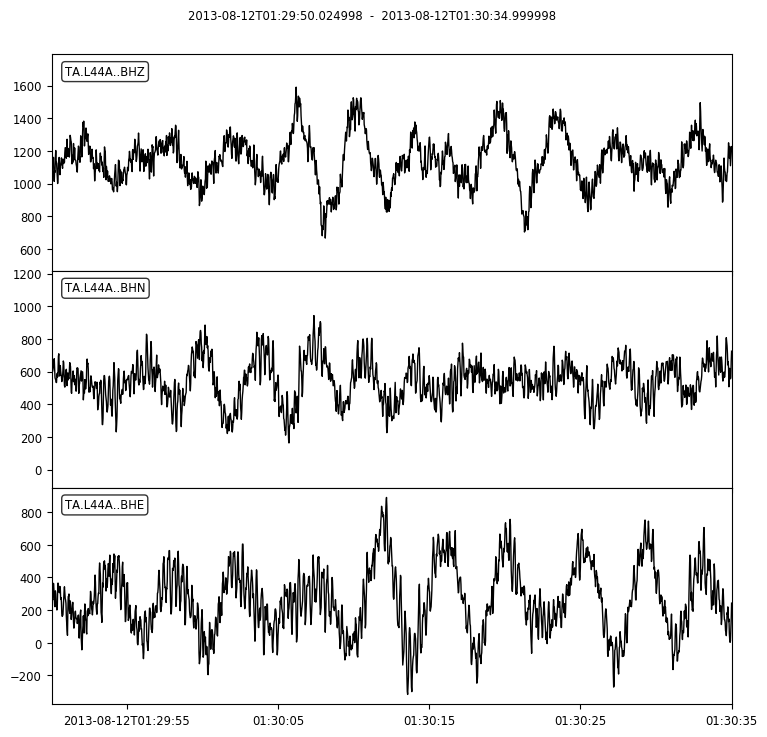

In [40]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client(user_agent="IRIS course, Evanston")
t = UTCDateTime("2013-08-12T08:30:00+07:00")
st = client.get_waveforms("TA", "L44A", "", "BH*", t - 10, t + 35) 
st.plot()

- Similar interfaces for the other clients
- The returned Stream object you already know
- For all of your custom processing workflows it does not matter if the data originates from a local file or from a webservice

The webservices are not limited to retrieving waveform data. Depending on the client module used, the available data includes:

- Event data
- Station inventory and response data
- Availability information
- ...

#### obspy.iris - Exercises

- Use the obspy.iris client and request some waveform data of your choice (e.g. a different TA station, or a different channel, or a time when an event happened somewhere, e.g. yesterdays M 6.8 off Colombia), plot it, run filters on it, etc.

### 3.3 obspy.signal - Signal Processing Routines

In [41]:
import obspy.signal
print dir(obspy.signal)

['PPSD', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', 'absolute_import', 'ascii', 'bytes', 'chr', 'detrend', 'dict', 'division', 'filter', 'headers', 'hex', 'input', 'int', 'invsim', 'list', 'map', 'next', 'object', 'oct', 'open', 'pow', 'print_function', 'range', 'round', 'spectral_estimation', 'str', 'super', 'unicode_literals', 'util', 'zip']


- This list is not complete as it does not show functions available in submodules
- Functionality can be browsed through or searched for in the [ObsPy docs](https://docs.obspy.org/packages/obspy.signal.html#module-obspy.signal)
- every day functionality is wrapped in convenience functions on [**`Trace`** / **`Stream`**](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html)

  - example: Filtering

In [42]:
tr = read()[0]

from obspy.signal.filter import bandpass
tr.data = bandpass(tr.data, 1, 10, tr.stats.sampling_rate)

In [43]:
tr = read()[0]

tr.filter("bandpass", freqmin=1, freqmax=10)

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

..much better to read in (foreign) code and much less error prone!

- example: Instrument correction

In [44]:
paz_sts2 = {\
    "poles": [-0.037004+0.037016j, -0.037004-0.037016j,
              -251.33+0j,
              -131.04-467.29j, -131.04+467.29j],
    "zeros": [0j, 0j],
    "gain": 60077000.0,
    "sensitivity": 2516778400.0}

st = read()
st.simulate(paz_remove=paz_sts2)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

- the response information can also be retrieved from a webservice, or from a SEED file
- instead of the ObsPy internal routine, evalresp can be used (from inside ObsPy)

- some other convenience functions that use functionality from obspy.signal in use:

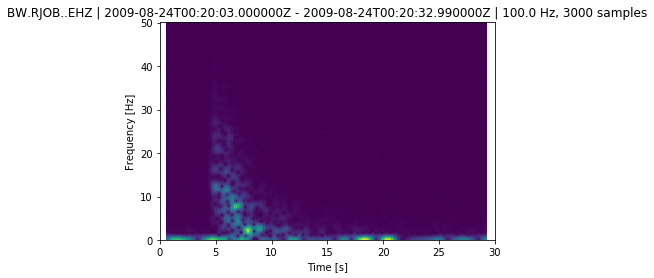

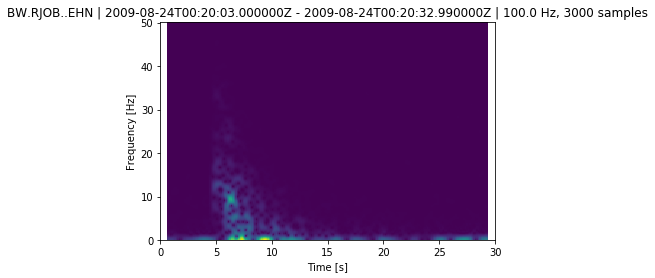

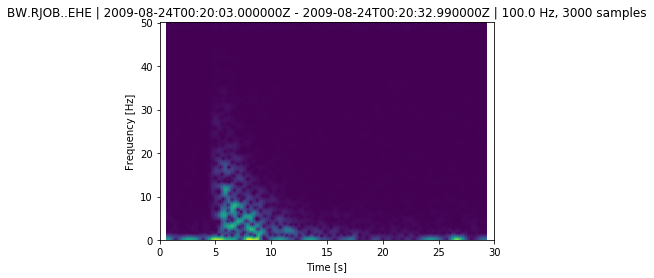

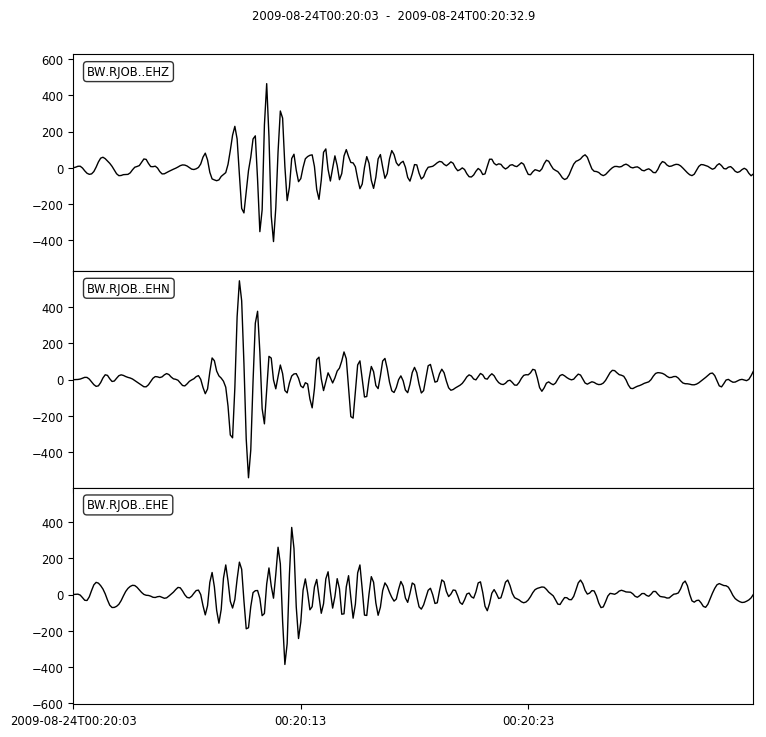

In [47]:
st = read()
st.spectrogram()

st.resample(10)
st.detrend("linear")
st.taper
st.filter("bandpass", freqmin=0.5, freqmax=2.0)

st.plot()

### 3.4 obspy.xseed - Handling Station Inventory Data

- Can currently read/write/convert between SEED/DatalessSEED and XML-SEED
- RESP file write support
- StationXML support is [currently being developed](https://github.com/obspy/obspy/pull/590) and due for the next major release (fall/winter).

In [46]:
from obspy.xseed import Parser
p = Parser("dataless_SEED")
print p
p.getCoordinates("BW.FURT..EHZ")
p.getPAZ("BW.FURT..EHZ")

ImportError: No module named xseed

In [ ]:
p.writeXSEED("dataless.xml")
p = Parser("dataless.xml")
p.writeSEED("edit_dataless_SEED")
p.writeRESP(".")

Data can be then be corrected for instrument response (and/or simulated to another instrument response) by either..

 - the ObsPy internal routine based on Poles and Zeros information and overall sensitivity
 - the wrapped evalresp routine

### 3.5 obspy.core.event - Event Handling

- Aims to get a unified interface with read and write support independent of the data source, similar to how the **`Stream`** and **`Trace`** classes handle waveform data
- Fully supports QuakeML 1.2 and is modelled after it

In [ ]:
from obspy import readEvents

url = "http://service.iris.edu/fdsnws/event/1/query?minmagnitude=8.5"
catalog = readEvents(url)
print catalog

- The readEvents() function always returns a **`Catalog`** object, which is
a collection of **`Event`** objects.

In [ ]:
print type(catalog)
print type(catalog[0])

In [ ]:
event = catalog[0]
print event

- Event objects are again collections of other resources.

In [ ]:
print type(event.origins[0])
print type(event.magnitudes[0])
print event.origins[0]

- The Catalog object contains some convenience methods to make
working with events easier.
- Events can be filtered with various keys.

In [ ]:
largest_magnitude_events = catalog.filter("magnitude >= 8.8")
print largest_magnitude_events

- There is a basic preview plot using the basemap module.

In [ ]:
catalog.plot()

- And they can be written.

In [ ]:
catalog.write("/tmp/modified_events.xml", format="QUAKEML")
!ls -l /tmp/modified_events.xml

In [ ]:
!head /tmp/modified_events.xml
!echo "..."
!tail /tmp/modified_events.xml

#### obspy.core.event - Exercise

- Feed one of the example query URLS at http://service.iris.edu/fdsnws/event/1/ to the **`readEvents()`** method 
- Print the resulting Catalog object and filter it, so it only contains events with a magnitude larger than a certain magnitude.
- Now assume you did a new magnitude estimation and want to add it to one event. Create a new magnitude object (import it from `obspy.core.event`), fill it with some values and append it to the magnitude list of the one of the events.
- Save the modified Catalog as a QuakeML object locally.